In [2]:
import networkx as nx
import matplotlib.pyplot as plt

class BraneWeb:
    """
    A networkx-based implementation for brane webs, including 7-branes.
    - Junctions and 7-branes are nodes with a 'type' attribute.
    - Branes are edges with charge and multiplicity.
    """
    def __init__(self):
        """Initializes an empty brane web."""
        self.web = nx.Graph()
        print("🕸️ BraneWeb initialized using networkx.")

    def add_junction(self, junction_id, pos):
        """Adds a junction point (a type of node)."""
        self.web.add_node(junction_id, pos=pos, type='junction')
        print(f"  -> Added Junction '{junction_id}' at {pos}.")

    def add_seven_brane(self, brane_id, pos):
        """Adds a 7-brane (a special type of node)."""
        self.web.add_node(brane_id, pos=pos, type='seven_brane')
        print(f"  -> Added 7-Brane '{brane_id}' at {pos}.")

    def add_brane(self, node1_id, node2_id, charge, multiplicity=1):
        """
        Adds a brane segment (edge) between any two nodes (junctions or 7-branes).
        """
        if node1_id not in self.web.nodes or node2_id not in self.web.nodes:
            raise ValueError("Both nodes must exist before adding a brane.")
        
        self.web.add_edge(node1_id, node2_id, charge=charge, mult=multiplicity)
        charge_str = f"({charge[0]},{charge[1]})"
        print(f"  -> Added {charge_str}-brane (n={multiplicity}) between '{node1_id}' and '{node2_id}'.")

    def draw(self, title="Brane Web with 7-Branes"):
        """Visualizes the entire web, distinguishing between node types."""
        fig, ax = plt.subplots(figsize=(10, 8))
        pos = nx.get_node_attributes(self.web, 'pos')

        # Separate nodes by type for different styling
        junctions = [n for n, d in self.web.nodes(data=True) if d['type'] == 'junction']
        seven_branes = [n for n, d in self.web.nodes(data=True) if d['type'] == 'seven_brane']

        # Draw edges (branes)
        for u, v, data in self.web.edges(data=True):
            charge = data.get('charge', (0,0))
            mult = data.get('mult', 1)
            color = 'gray'
            if charge == (1, 0): color = 'blue'   # D5
            elif charge == (0, 1): color = 'red'    # NS5
            elif charge != (0,0): color = 'green' # (p,q)
            nx.draw_networkx_edges(self.web, pos, edgelist=[(u,v)], width=1.5 * mult, edge_color=color, ax=ax)
        
        # Draw the different types of nodes
        nx.draw_networkx_nodes(self.web, pos, nodelist=junctions, node_color='skyblue', node_size=500, node_shape='o', label='Junction')
        nx.draw_networkx_nodes(self.web, pos, nodelist=seven_branes, node_color='purple', node_size=700, node_shape='X', label='7-Brane')

        # Draw labels for all nodes and edges
        nx.draw_networkx_labels(self.web, pos, font_weight='bold', ax=ax)
        edge_labels = { (u,v): f"n={d['mult']}" for u,v,d in self.web.edges(data=True) }
        nx.draw_networkx_edge_labels(self.web, pos, edge_labels=edge_labels, font_size=8, font_color='black')
        
        ax.set_title(title)
        ax.set_xlabel("x-dimension")
        ax.set_ylabel("y-dimension")
        ax.grid(True, linestyle='--', alpha=0.6)
        ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
        ax.legend()
        ax.set_aspect('equal')
        plt.show()

🕸️ BraneWeb initialized using networkx.
  -> Added 7-Brane '7B_left' at (-3, 0).
  -> Added 7-Brane '7B_right' at (3, 0).
  -> Added Junction 'J1' at (0, 0).
  -> Added Junction 'D5_anchor' at (0, -3).
  -> Added (0,1)-brane (n=1) between '7B_left' and 'J1'.
  -> Added (0,1)-brane (n=1) between 'J1' and '7B_right'.
  -> Added (1,0)-brane (n=4) between 'D5_anchor' and 'J1'.


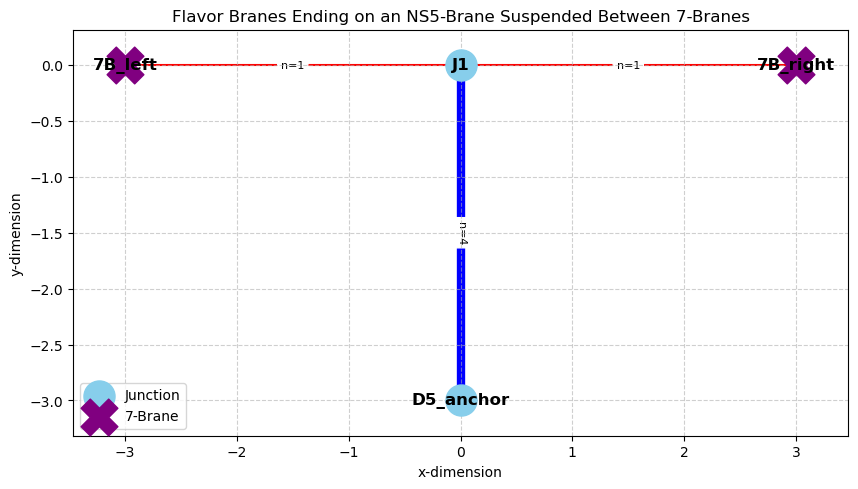

In [3]:
if __name__ == "__main__":
    # 1. Create the web
    my_web = BraneWeb()

    # 2. Add two 7-branes to serve as boundaries
    my_web.add_seven_brane('7B_left', pos=(-3, 0))
    my_web.add_seven_brane('7B_right', pos=(3, 0))

    # 3. Add a junction point on the segment between the 7-branes
    my_web.add_junction('J1', pos=(0, 0))

    # 4. Add an "anchor" node for the D5-branes coming from infinity
    my_web.add_junction('D5_anchor', pos=(0, -3))
    
    # 5. Add the branes to connect the components
    # An NS5-brane (charge 0,1) stretches from the left 7-brane to the junction...
    my_web.add_brane('7B_left', 'J1', charge=(0, 1), multiplicity=1)
    # ...and continues from the junction to the right 7-brane.
    my_web.add_brane('J1', '7B_right', charge=(0, 1), multiplicity=1)
    
    # A stack of 4 D5-branes (charge 1,0) representing flavors ends on the junction
    my_web.add_brane('D5_anchor', 'J1', charge=(1, 0), multiplicity=4)

    # 6. Visualize the final configuration
    my_web.draw(title="Flavor Branes Ending on an NS5-Brane Suspended Between 7-Branes")